In [1]:
#se_f = "/data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_A2_black/annotation_clones/SE.rds"
#outdir = "/data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_A2_black/annotation_clones/umap_clones_overlay"
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/SE.rds"
se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/annotation/gff_A2_black/mergedSamples/allSamples.integrated.rds" 
cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/cells_meta.tsv"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay"


In [2]:
library("Nebulosa")


library("Seurat")
#library("Seurat")
library(magrittr)
library(cowplot)
library(ggplot2)
library(Signac)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)

Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Loading required package: patchwork

Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

Attaching sp

Warning message:
“package ‘magrittr’ was built under R version 4.1.3”

Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘future’ was built under R version 4.1.3”


In [3]:
#BiocManager::install("Nebulosa")


In [4]:
cells_meta <- as.data.frame(readr::read_tsv(cells_meta_f),) # %>% tidyr::unite(barcode)

curr.cols <- colnames(cells_meta) 
curr.cols[[1]] = "cell"
curr.cols
colnames(cells_meta)  <- curr.cols
row.names(cells_meta) <- cells_meta$cell
cells_meta

New names:
• `` -> `...1`
Rows: 8660 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): ...1, cloneID, condition, clusterID
dbl (1): donor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "cell"      "donor"     "cloneID"   "condition" "clusterID"

,cell,donor,cloneID,condition,clusterID
,<chr>,<dbl>,<chr>,<chr>,<chr>
TTAGCGAGTGGTGGTA-1_Flt3l,TTAGCGAGTGGTGGTA-1_Flt3l,0,0_C6,Flt3l,macrophage
GTCTACCAGTGTCCCG-1_Input,GTCTACCAGTGTCCCG-1_Input,0,0_C8,Input,neutrophil B
TTACGGAAGTCTGTGT-1_Flt3l,TTACGGAAGTCTGTGT-1_Flt3l,0,0_C4,Flt3l,neutrophil
GTGTGATCAGCGCGTT-1_Input,GTGTGATCAGCGCGTT-1_Input,0,0_C2,Input,MPP/CMP/GMP
AGGCGAACATTGCCTC-1_Input,AGGCGAACATTGCCTC-1_Input,0,0_C2,Input,MPP/CMP/GMP B
AACCGATTCTGTTTAC-1_Flt3l,AACCGATTCTGTTTAC-1_Flt3l,0,0_C0,Flt3l,erythroid
TATTGCTGTGAGTAAT-1_Input,TATTGCTGTGAGTAAT-1_Input,0,0_C2,Input,MPP/CMP/GMP B
CTGCGTTCAGGTCTGC-1_Input,CTGCGTTCAGGTCTGC-1_Input,0,0_C2,Input,MPP/CMP/GMP B
GTGACATCAGGTGTCC-1_Flt3l,GTGACATCAGGTGTCC-1_Flt3l,0,0_C0,Flt3l,neutrophil B


## Need to change the cell IDs to have condition as prefix

In [5]:
se <- readRDS(se_f)
se$ID <- apply(stringr::str_split((rownames(se[[]])), "_", simplify=T)[,1:2], 1, function(x) {paste0(x[[2]],  "_", x[[1]])})
se <- RenameCells(se, new.names=se$ID)

coord = max(max(Embeddings(se[["umap"]])), abs(min(Embeddings(se[["umap"]]))))
coord
se[[]]



[1] 9.523125

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<int>,<chr>
AAACGAAAGAATCAGT-1_Control,Control,1972,1972,6432,1259,31,19,266,1066,3791,⋯,0.03,50.17146,0,Low,NS < 4,6,6,2211,1942,AAACGAAAGAATCAGT-1_Control
AAACGAAAGCATACCT-1_Control,Control,2674,2674,11858,1937,51,34,549,3102,6185,⋯,0.23,40.17785,0,Low,NS < 4,7,7,3311,2750,AAACGAAAGCATACCT-1_Control
AAACGAAAGCGAGAAA-1_Control,Control,1939,1939,7365,1097,25,27,275,2184,3757,⋯,0.91,48.62923,0,Low,NS < 4,7,7,2112,1838,AAACGAAAGCGAGAAA-1_Control
AAACGAAAGTACAGAT-1_Control,Control,862,862,4095,861,16,16,230,771,2201,⋯,0.79,36.34711,0,Low,NS < 4,4,4,1441,1317,AAACGAAAGTACAGAT-1_Control
AAACGAAAGTACAGTA-1_Control,Control,1775,1775,8088,1091,27,27,369,2157,4417,⋯,0.04,38.41974,0,Low,NS < 4,6,6,2385,2085,AAACGAAAGTACAGTA-1_Control
AAACGAAAGTGTCGGA-1_Control,Control,756,756,3362,524,15,12,154,836,1821,⋯,0.14,39.75837,0,Low,NS < 4,4,4,1133,1068,AAACGAAAGTGTCGGA-1_Control
AAACGAACACTCGCAG-1_Control,Control,1444,1444,6285,831,22,23,319,1872,3218,⋯,0.46,42.51088,0,Low,NS < 4,1,1,1855,1658,AAACGAACACTCGCAG-1_Control
AAACGAAGTCTTAGCA-1_Control,Control,1921,1921,10456,1353,31,23,417,3769,4863,⋯,0.94,37.52827,0,High,NS < 4,4,4,2918,2480,AAACGAAGTCTTAGCA-1_Control
AAACGAAGTGAGGGTT-1_Control,Control,425,425,1347,226,5,9,48,307,752,⋯,0.25,51.59574,0,Low,NS < 4,9,9,439,426,AAACGAAGTGAGGGTT-1_Control


In [6]:
cells_meta

,cell,donor,cloneID,condition,clusterID
,<chr>,<dbl>,<chr>,<chr>,<chr>
TTAGCGAGTGGTGGTA-1_Flt3l,TTAGCGAGTGGTGGTA-1_Flt3l,0,0_C6,Flt3l,macrophage
GTCTACCAGTGTCCCG-1_Input,GTCTACCAGTGTCCCG-1_Input,0,0_C8,Input,neutrophil B
TTACGGAAGTCTGTGT-1_Flt3l,TTACGGAAGTCTGTGT-1_Flt3l,0,0_C4,Flt3l,neutrophil
GTGTGATCAGCGCGTT-1_Input,GTGTGATCAGCGCGTT-1_Input,0,0_C2,Input,MPP/CMP/GMP
AGGCGAACATTGCCTC-1_Input,AGGCGAACATTGCCTC-1_Input,0,0_C2,Input,MPP/CMP/GMP B
AACCGATTCTGTTTAC-1_Flt3l,AACCGATTCTGTTTAC-1_Flt3l,0,0_C0,Flt3l,erythroid
TATTGCTGTGAGTAAT-1_Input,TATTGCTGTGAGTAAT-1_Input,0,0_C2,Input,MPP/CMP/GMP B
CTGCGTTCAGGTCTGC-1_Input,CTGCGTTCAGGTCTGC-1_Input,0,0_C2,Input,MPP/CMP/GMP B
GTGACATCAGGTGTCC-1_Flt3l,GTGACATCAGGTGTCC-1_Flt3l,0,0_C0,Flt3l,neutrophil B


In [7]:
se <- AddMetaData(se, cells_meta)
se

An object of class Seurat 
221404 features across 18672 samples within 2 assays 
Active assay: RNA (19039 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [8]:
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID,cell,donor,cloneID,condition,clusterID
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<dbl>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
AAACGAAAGAATCAGT-1_Control,Control,1972,1972,6432,1259,31,19,266,1066,3791,⋯,6,6,2211,1942,AAACGAAAGAATCAGT-1_Control,NA,NA,NA,NA,NA
AAACGAAAGCATACCT-1_Control,Control,2674,2674,11858,1937,51,34,549,3102,6185,⋯,7,7,3311,2750,AAACGAAAGCATACCT-1_Control,NA,NA,NA,NA,NA
AAACGAAAGCGAGAAA-1_Control,Control,1939,1939,7365,1097,25,27,275,2184,3757,⋯,7,7,2112,1838,AAACGAAAGCGAGAAA-1_Control,AAACGAAAGCGAGAAA-1_Control,0,0_C6,Control,MPP/CMP/GMP C
AAACGAAAGTACAGAT-1_Control,Control,862,862,4095,861,16,16,230,771,2201,⋯,4,4,1441,1317,AAACGAAAGTACAGAT-1_Control,AAACGAAAGTACAGAT-1_Control,0,0_C0,Control,erythroid
AAACGAAAGTACAGTA-1_Control,Control,1775,1775,8088,1091,27,27,369,2157,4417,⋯,6,6,2385,2085,AAACGAAAGTACAGTA-1_Control,NA,NA,NA,NA,NA
AAACGAAAGTGTCGGA-1_Control,Control,756,756,3362,524,15,12,154,836,1821,⋯,4,4,1133,1068,AAACGAAAGTGTCGGA-1_Control,NA,NA,NA,NA,NA
AAACGAACACTCGCAG-1_Control,Control,1444,1444,6285,831,22,23,319,1872,3218,⋯,1,1,1855,1658,AAACGAACACTCGCAG-1_Control,AAACGAACACTCGCAG-1_Control,0,0_C4,Control,neutrophil
AAACGAAGTCTTAGCA-1_Control,Control,1921,1921,10456,1353,31,23,417,3769,4863,⋯,4,4,2918,2480,AAACGAAGTCTTAGCA-1_Control,NA,NA,NA,NA,NA
AAACGAAGTGAGGGTT-1_Control,Control,425,425,1347,226,5,9,48,307,752,⋯,9,9,439,426,AAACGAAGTGAGGGTT-1_Control,NA,NA,NA,NA,NA


In [9]:
cloneID <- (unique(cells_meta$cloneID))
cloneID <- cloneID[! cloneID=="None"]

In [10]:
cloneID

[1] "0_C6" "0_C8" "0_C4" "0_C2" "0_C0" "0_C5" "0_C9" "0_C3" "0_C7" "0_C1"

In [11]:
cond <- (unique(cells_meta$condition))
cond <- cond[! cond=="None"]
cond

[1] "Flt3l"   "Input"   "Control"

In [12]:
donors <- levels(as.factor(cells_meta$donor))
donors <-  donors[donors != "None"]
donors

[1] "0"

In [13]:
dimplots.conditon.f <- function(cl, se)
    
{
    print(cl)  
    try({
        curr.dir <- file.path(outdir, paste0("cloneID_",cl))
        print('curr.dir')
        print(curr.dir)
        dir.create(curr.dir)
        plot_density(se, "cloneID") +
            xlim(-1*coord-0.01,coord+0.01) +
            ylim(-1*coord-0.01,coord+0.01)
        ggsave(file.path(curr.dir, paste0("cloneID_", cl, "umap_density.png")))
        
        d <- DimPlot(object = subset(x = se, subset = cloneID == cl), label = FALSE, 
                     group.by=c("clusterID"), shape.by=c("condition"), pt.size=2) +
            xlim(-1*coord-0.01,coord+0.01) +
            ylim(-1*coord-0.01,coord+0.01)
        ggsave(file.path(curr.dir, paste0("cloneID_", cl, "umap_clust_color.png")))
        #ggsave(file.path(curr.dir, paste0("cloneID_", cl, "clust_color.pdf")))

        if(length(cond)>1)
            d <- DimPlot(object = subset(x = se, subset = cloneID == cl), label = FALSE, 
                         group.by=c("condition"), pt.size=2) +
                xlim(-1*coord-0.01,coord+0.01) +
                ylim(-1*coord-0.01,coord+0.01)
            ggsave(file.path(curr.dir, paste0("cloneID_", cl, ".umap_cond_color.png")))    
            #ggsave(file.path(curr.dir, paste0("cloneID_", cl, "cond_color.pdf")))
        

        

    })
}
    


In [14]:
outdir

[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay"

In [15]:
dimplots <- sapply(cloneID, FUN=dimplots.conditon.f, se=se)
#d <- dimplots.conditon.f(names[[10]], se) 
#d

[1] "0_C6"
[1] "curr.dir"
[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C6"


Warning message in dir.create(curr.dir):
“'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C6' already exists”


Error in sum(w) : invalid 'type' (character) of argument
[1] "0_C8"
[1] "curr.dir"
[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C8"


Warning message in dir.create(curr.dir):
“'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C8' already exists”


Error in sum(w) : invalid 'type' (character) of argument
[1] "0_C4"
[1] "curr.dir"
[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C4"


Warning message in dir.create(curr.dir):
“'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C4' already exists”


Error in sum(w) : invalid 'type' (character) of argument
[1] "0_C2"
[1] "curr.dir"
[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C2"


Warning message in dir.create(curr.dir):
“'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C2' already exists”


Error in sum(w) : invalid 'type' (character) of argument
[1] "0_C0"
[1] "curr.dir"
[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C0"


Warning message in dir.create(curr.dir):
“'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C0' already exists”


Error in sum(w) : invalid 'type' (character) of argument
[1] "0_C5"
[1] "curr.dir"
[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C5"


Warning message in dir.create(curr.dir):
“'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C5' already exists”


Error in sum(w) : invalid 'type' (character) of argument
[1] "0_C9"
[1] "curr.dir"
[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C9"


Warning message in dir.create(curr.dir):
“'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C9' already exists”


Error in sum(w) : invalid 'type' (character) of argument
[1] "0_C3"
[1] "curr.dir"
[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C3"


Warning message in dir.create(curr.dir):
“'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C3' already exists”


Error in sum(w) : invalid 'type' (character) of argument
[1] "0_C7"
[1] "curr.dir"
[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C7"


Warning message in dir.create(curr.dir):
“'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C7' already exists”


Error in sum(w) : invalid 'type' (character) of argument
[1] "0_C1"
[1] "curr.dir"
[1] "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C1"


Warning message in dir.create(curr.dir):
“'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/umap_overlay/0_C1' already exists”


Error in sum(w) : invalid 'type' (character) of argument


Picking joint bandwidth of 1.12

Picking joint bandwidth of 0.583



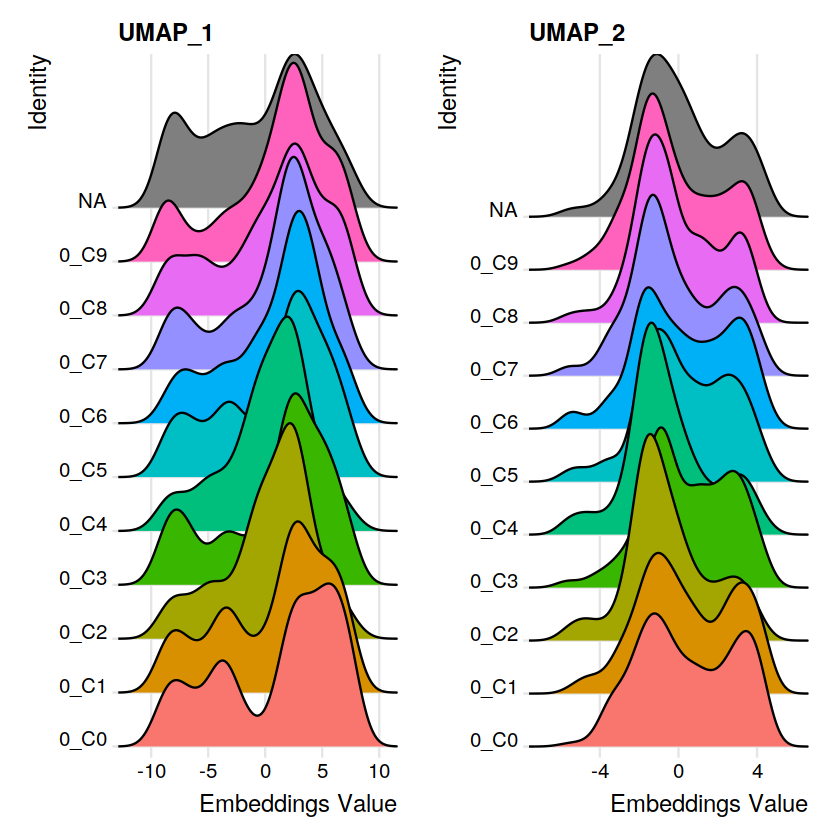

In [16]:
RidgePlot(object = se, group.by="cloneID", features = c('UMAP_1', 'UMAP_2'), sort=F)